# Part7 Section2: Random Module

## part07-04_lottery_numbers

Please write a function named lottery_numbers(amount: int, lower: int, upper: int), which generates as many random numbers as specified by the first argument. All numbers should fall within the bounds lower to upper. The numbers should be stored in a list and returned. The numbers should be in ascending order in the returned list.

As these are lottery numbers, no number should appear twice in the list.

In [ ]:
# my code: using random.sample()

import random
def lottery_numbers(amount: int, lower: int, upper: int):
    pool = list(range(lower, upper+1))
    lottery_list = sorted(random.sample(pool,amount))
    return lottery_list

if __name__ == "__main__":
    for number in lottery_numbers(7, 1, 40):
        print(number)


In [ ]:
# sample: using list + random.randint

from random import randint
 
def lottery_numbers(amount: int, lower: int, upper: int):
    numbers = []
    while len(numbers) < amount:
        number = randint(lower, upper)
        if number not in numbers:
            numbers.append(number)
 
    return sorted(numbers)

## part07-05_password_generator_part_1

Please write a function which creates passwords of a desired length, consisting of lowercase characters a to z.

In [ ]:
# my code: import the module

import random
import string
def generate_password(num:int):
    '''a function which creates passwords of a desired length, consisting of lowercase characters a to z.'''
    password = ''

    for _ in range(num):
        char = random.choice(string.ascii_lowercase)
        password += char
    
    return password

if __name__ == "__main__":
    for i in range(10):
        print(generate_password(8))


In [ ]:
# standard: import functions

from random import choice
from string import ascii_lowercase
 
def generate_password(length: int):
    passwd = ""
    for i in range(length):
        passwd += choice(ascii_lowercase)
 
    return passwd

## part07-06_password_generator_part_2

Please write an improved version of your password generator. The function now takes three arguments:

If the second argument is True, the generated password should also contain one or more numbers.
If the third argument is True, the generated password should also contain one or more of these special characters: !?=+-()#.
Despite these two additional arguments, the password should always contain at least one lowercase alphabet. You may assume the function will only be called with combinations of arguments that are possible to formulate into passwords following these rules. That is, the arguments will not specify e.g. a password of length 2 which contains both a number and a special characters, for then there would not be space for the mandatory lowercase letter.

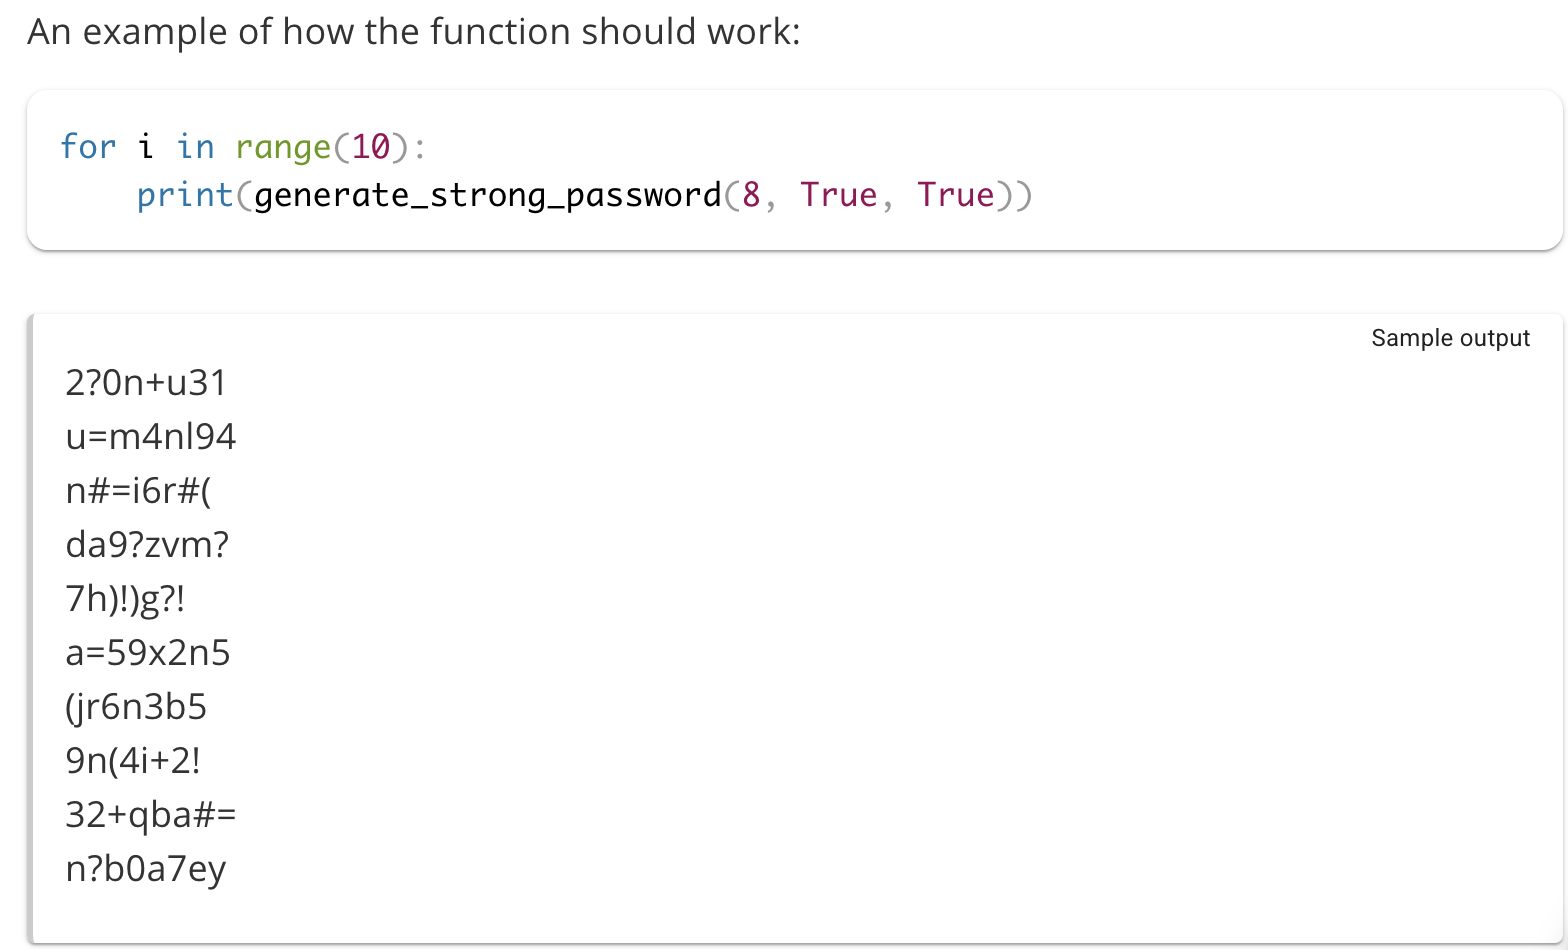

In [ ]:
# standard ans
from random import choice, randint
from string import ascii_lowercase, digits
 
def generate_strong_password(length: int, numbers: bool, special_characters: bool):
    special_chars = "!?=+-()#"
    # One letter at beginning of the password
    passwd = choice(ascii_lowercase)
    choice_set = ascii_lowercase
 
    # If numbers is wanted, add at least one number
    if numbers:
        passwd = add_character(passwd, digits)
        choice_set += digits
 
    # same for special characters
    if special_characters:
        passwd = add_character(passwd, special_chars)
        choice_set += special_chars
 
    # build the rest of the password from the whole set
    while (len(passwd) < length):
        passwd = add_character(passwd, choice_set)
 
    return passwd
 
# Add a random character from the given set either
# at the beginning or end of the string
def add_character(passwd: str, characters):
    character = choice(characters)
    if randint(1,2) == 1:
        return character + passwd
    else:
        return passwd + character
    
if __name__ == "__main__":
    for i in range(3):
        print(generate_strong_password(5, True, True))

?#3ip
!2d+?
2r4=e


In [ ]:
# my code: 我的密码随机性更高
import random
import string

def generate_strong_password(num:int, arg1: bool, arg2: bool):
    password = []
    punctuation = '!?=+-()#' # 规定special characters: !?=+-()# --非string.punctuation
    password.append(random.choice(string.ascii_lowercase)) # the password should always contain at least one lowercase alphabet
    
    num -= 1 # 位数

    if arg1 == True and arg2 == True:
        pool = string.digits + punctuation + string.ascii_lowercase # --> pool: string
        password.append(random.choice(punctuation))
        password.append(random.choice(string.digits))
        num -= 2
    elif arg1 == False and arg2 == False: 
        pool = string.ascii_lowercase
    elif arg1 == False: 
        pool = punctuation + string.ascii_lowercase
        password.append(random.choice(punctuation))
        num -= 1
    elif arg2 == False:
        pool = string.digits + string.ascii_lowercase
        password.append(random.choice(string.digits))
        num -= 1
    
    password += random.sample(pool, num) # list
    # print(f'pool={pool},{type(pool)}') # str: --> pool=!?=+-()#abcdefghijklmnopqrstuvwxyz,<class 'str'>

    random.shuffle(password) # 第一位添加为lowercase，因此洗牌
    passwd = ''.join(password)
    return passwd


if __name__ == "__main__":
    for i in range(10):
        print(generate_strong_password(5, False, True))

---

# Part7 Section3: Datetime Module

## part07-10_valid_pic(Finnish Personal Identity Codes (PIC))
you will validate Finnish Personal Identity Codes (PIC).

Please write a function named is_it_valid(pic: str), which returns True or False based on whether the PIC given as an argument is valid or not. Finnish PICs follow the format ddmmyyXyyyz, where ddmmyy contains the date of birth, X is the marker for century, yyy is the personal identifier and z is a control character.

The program should check the validity by these three criteria:

>The first half of the code is a valid, existing date in the format ddmmyy.

>The century marker is either + (1800s), - (1900s) or A (2000s).

>The control character is valid.

The control character is calculated by taking the nine-digit number created by the date of birth and the personal identifier, dividing this by 31, and selecting the character at the index specified by the remainder from the string 0123456789ABCDEFHJKLMNPRSTUVWXY. For example, if the remainder was 12, the control character would be C.


More examples and explanations of the uses of the PIC are available at the Digital and Population Data Services Agency.

NB! Please make sure you do not share your own PIC, for example in the code you use for testing or through the course support channels.

Here are some valid PICs you can use for testing:

230827-906F

120488+246L

310823A9877

In [ ]:
# my code
import datetime as dt

def is_it_valid(pic: str):
    z_pool = "0123456789ABCDEFHJKLMNPRSTUVWXY"
    x_pool = '-+A'

    ddmmyy = pic[:6]
    print(f'ddmmyy={ddmmyy}')
    x = pic[6] # The century marker is either + (1800s), - (1900s) or A (2000s).
    id = pic[7:10] # personal id
    print(f'id={id}')
    z = pic[-1] # control char


    # check: length
    if len(pic) != 11:
        return False
    # check: id and ddmmyy are num
    numbers = pic[:6]+pic[7:10]
    for x in numbers:
        if x not in "0123456789":
            return False
    # check: x(century marker) and year
    if x in x_pool:
        if x == '-':
            yyyy = '18' + ddmmyy[-2:]
        elif x == '+':
            yyyy = '19' + ddmmyy[-2:]
        else:
            yyyy = '20' + ddmmyy[-2:]
    else:
        return False
    print(f'x, yyyy = {x, yyyy}')

    # check: if date is valid
    try:
        birth = dt.datetime(int(yyyy), int(ddmmyy[2:4]), int(ddmmyy[:2])) # year, month, day
        print(f'birth = {birth.date()}')
    except ValueError:
        print('ValueError fasle')
        return False
    
    # Check: The control character is valid
    remainder = int((ddmmyy + id)) % 31 # nine_digit % 31
    check_z = z_pool[remainder]
    # print(f'9digit = {int((ddmmyy + id))},remainder = {remainder}, check_z = {check_z}, z = {z}')
    if check_z == z:
        return True
    else:
        return False
    

if __name__ == "__main__":
    # print(is_it_valid('230827-906F')) # true
    print(is_it_valid('290200A1239')) # true
    # print(is_it_valid('030103A493DD')) # false



In [ ]:
# standard code

from datetime import datetime
 
def is_it_valid(pic: str):
    if len(pic) != 11:
        return False
    numbers = pic[:6]+pic[7:10]
    for x in numbers:
        if x not in "0123456789":
            return False
    century_marker = pic[6]
    if century_marker not in "+-A":
        return False
    day = int(pic[:2])
    month = int(pic[2:4])
    year = int(pic[4:6])
    if century_marker == "+":
        year += 1800
    if century_marker == "-":
        year += 1900
    if century_marker == "A":
        year += 2000
    try:
        test = datetime(year, month, day)
    except:
        return False
    characters = "0123456789ABCDEFHJKLMNPRSTUVWXYZ"
    index = int(numbers)%31
    return characters[index] == pic[-1]

## part07-11_screen_time
Please write a program for recording the amount of time the user has spent in front of a television, computer or mobile device screen over a specific period of time.

The program should work as follows:

Sample output
Filename: late_june.txt
Starting date: 24.6.2020
How many days: 5
Please type in screen time in minutes on each day (TV computer mobile):
Screen time 24.06.2020: 60 120 0
Screen time 25.06.2020: 0 0 0
Screen time 26.06.2020: 180 0 0
Screen time 27.06.2020: 25 240 15
Screen time 28.06.2020: 45 90 5
Data stored in file late_june.txt

The user will input each day on a separate line, and the entries will contain three numbers separated by spaces, representing minutes.

With the above input, the program should store the data in a file named late_june.txt. The contents should look like this:

Sample data
Time period: 24.06.2020-28.06.2020
Total minutes: 780
Average minutes: 156.0
24.06.2020: 60/120/0
25.06.2020: 0/0/0
26.06.2020: 180/0/0
27.06.2020: 25/240/15
28.06.2020: 45/90/5

In [ ]:
# My Code
# dt.datetime(); dt.timedelta(); dt.datetime.strftime(); dt.datetime.strptime()

import datetime as dt

if True: 
    file_name = input('Filename: ')
    input_date = input('Starting date:')
    days = int(input('How many days:'))
else:
    file_name = 'late_june.txt'
    input_date = '24.6.2020'
    days = int(1)

starting_date_obj = dt.datetime.strptime(input_date,'%d.%m.%Y').date() # datetime obj
date = starting_date_obj.day # --int
month = starting_date_obj.month
year = starting_date_obj.year

# print(f'starting_date_obj={starting_date_obj}, days={days}')

print('Please type in screen time in minutes on each day (TV computer mobile):')
min_dict = {}
total_min = 0
for num in range(days):
    show_date_obj = starting_date_obj + dt.timedelta(days=num) # 不可以简单用show_date = date + num，跨月报错
    show_date_str = show_date_obj.strftime('%d.%m.%Y')

    input_min = input(f'Screen time {show_date_str}: ') # --str
    min_list = [int(item) for item in input_min.split(' ')] # --list of int
    total_min += sum(min_list)

    min_dict[num] = (show_date_str, min_list)

# print(f'min_dict={min_dict},\n total_min = {total_min}')

start = dt.datetime.strptime(min_dict[0][0],'%d.%m.%Y')
start_str = start.strftime('%d.%m.%Y')
end = dt.datetime.strptime(min_dict[days-1][0], '%d.%m.%Y')
end_str = end.strftime('%d.%m.%Y')
                             
# print(f'Time period: {start_str}-{end_str}')
# print(f'Total minutes: {total_min}')
# print(f'Average minutes: {total_min/days}')

with open (file_name,'w') as file:
    file.write(f'Time period: {start_str}-{end_str}\n')
    file.write(f'Total minutes: {total_min}\n')
    file.write(f'Average minutes: {total_min/days}\n')
    for num in range(days):
        dates_list = min_dict[num][1]
        line = '/'.join(map(str, dates_list))
        this_day = dt.datetime.strptime(min_dict[num][0],'%d.%m.%Y')
        this_day_str = this_day.strftime('%d.%m.%Y')
        file.write(f'{this_day_str}: {line}\n')
        

In [ ]:
# standard: 推荐

from datetime import datetime, timedelta
 
week = timedelta(days=7)
 
def format(aika):
    return aika.strftime("%d.%m.%Y")
 
file = input("Filename: ")
start = input("Starting date: ").split('.')
days = int(input("How many days: "))
print("Please type in screen time in minutes on each day (TV computer mobile):")
 
screen_times = []
total = 0
start = datetime(int(start[2]), int(start[1]), int(start[0])) # 将input转化成datetime obj
 
for i in range(days):
    day = start + timedelta(days=i)
    times = input(f"Screen time {format(day)}: ").split(' ')
    tv = int(times[0])
    pc = int(times[1])
    mobile = int(times[2])
    total += tv + pc + mobile
    screen_times.append((day, tv, pc, mobile) ) #-->tuple into the list
 
with open(file, "w") as tdsto:
    tdsto.write(f"Time period: {format(start)}-{format(start + timedelta(days=(days-1)))}\n")
    tdsto.write(f"Total minutes: {total}\n")
    tdsto.write(f"Average minutes: {total/days:.1f}\n")
    for pv, tv, pc, mob in screen_times:
        tdsto.write(f"{format(pv)}: {tv}/{pc}/{mob}\n")
 
print(f"Data stored in file {file}")
# Write your solution here

# Part7 Section4: Read Json File

 ## part07-12_json_files

 Please write a function named print_persons(filename: str), which reads a JSON file in the above format, and prints the contents as shown below. The file may contain any number of entries.

In [ ]:
# standard ans

import json
def print_persons(filename: str):
    with open(filename) as f:
        content = f.read()
    persons = json.loads(content)
    for person in persons:
        name = person['name']
        age = person['age']
        hobbies = ", ".join(person['hobbies'])
        print(f"{name} {age} years ({hobbies})")

In [ ]:
# My code
import json

def json_reader(filename: str): 
    with open (filename) as file:
        data = json.load(file)
    return data

def print_persons(filename: str):
    data = json_reader(filename)
    for item in data:
        keys = list(item.keys()) # list of keys
        # print(keys)
        name = item[keys[0]]
        age = item[keys[1]]
        hobbies = item[keys[2]]
        print_hobbies = ", ".join(hobbies)
        print(f'{name} {age} years ({print_hobbies})')


if __name__ == "__main__":
    """output format: Peter Pythons 27 years (coding, knitting)"""
    # print(json_reader('file1.json'))
    print_persons('file1.json')


# Part7 Section5: Your Own Modules

## part07-17_string_helper

write a module named string_helper, which contains the following functions:

The function change_case(orig_string: str) creates and returns a new version of the parameter string. The lowercase letters in the original should be uppercase, and uppercase letters should be lowercase.

The function split_in_half(orig_string: str) splits the parameter string in half, and returns the results in a tuple. If the original has an odd number of characters, the first half should be shorter.

The function remove_special_characters(orig_string: str) returns a new version of the parameter string, with all special characters removed. Only lowercase and uppercase letters, numbers and spaces are allowed in the returned string.

In [ ]:
# My code

import string
# string module: https://docs.python.org/3/library/string.html#string.ascii_lowercase

def change_case(orig_string: str):
    new_str = ""
    for alph in orig_string:
        if alph in string.ascii_lowercase:
            alph = alph.upper()
        elif alph in string.ascii_uppercase:
            alph = alph.lower()
        new_str += alph
    return new_str

def split_in_half(orig_string: str):
    first_half_len = int(len(orig_string)/2) # --shorter
    first_half = orig_string[:first_half_len]
    second_half = orig_string[first_half_len:]
    return first_half, second_half

def remove_special_characters(orig_string: str): # --Only lowercase and uppercase letters, numbers and spaces are allowed
    new_str = ''
    for letter in orig_string:
        if (letter.lower() in string.ascii_lowercase) or (letter in string.digits) or (letter ==' '):
            new_str += letter
    return new_str



if __name__ == "__main__":
    # examples of how the module would be used:
    import string_helper
    my_string = "Well hello there!"
    print(string_helper.change_case(my_string))

    p1, p2 = string_helper.split_in_half(my_string)
    print(p1)
    print(p2)

    m2 = string_helper.remove_special_characters("This is a test, lets see how it goes!!!11!")
    print(m2)


    # only for my testing without importing as a moduel
    my_string = "Well hello there!"
    print(change_case(my_string))

    p1, p2 = split_in_half(my_string)
    print(p1)
    print(p2)

    m2 = remove_special_characters("This is a test, lets see how it goes!!!11!")
    print(m2)